In [ ]:
# Demonstration of determining word frequency from a given url

In [1]:
import requests
from bs4 import BeautifulSoup # scrape data from HTML 
import re # regular expressions
import nltk # NLP tool kit
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get the dataset from link
dataset = 'https://www.gutenberg.org/files/1661/1661-h/1661-h.htm'
reading = requests.get(dataset) # send a request to the server dataset and save the response (HTML) in reading

In [29]:
# extract the text with webscrapping tool BeautifulSoup
html = reading.text

data = BeautifulSoup(html, "html5lib") 

# data.prettify # show the HTML in a readable way
data.title # show the <title> in the html 

<title>The Project Gutenberg Book of The Adventures of Sherlock Holmes, by Arthur Conan Doyle</title>

In [10]:
data.findAll('a')[:12] # find the chapters

[<a href="https://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="https://www.gutenberg.org/ebooks/48320">
 [ #48320 ]</a>,
 <a href="#chap01">A Scandal in Bohemia</a>,
 <a href="#chap02">The Red-Headed League</a>,
 <a href="#chap03">A Case of Identity</a>,
 <a href="#chap04">The Boscombe Valley Mystery</a>,
 <a href="#chap05">The Five Orange Pips</a>,
 <a href="#chap06">The Man with the Twisted Lip</a>,
 <a href="#chap07">The Adventure of the Blue Carbuncle</a>,
 <a href="#chap08">The Adventure of the Speckled Band</a>,
 <a href="#chap09">The Adventure of the Engineer’s Thumb</a>,
 <a href="#chap10">The Adventure of the Noble Bachelor</a>]

In [14]:
# CONVERTING TEXT INTO TOKENS

# Tokenize the text with regular expressions
# "w+": This expression matches the alphanumeric character in the text

text = data.get_text() # remember data contains the html
token = re.findall('\w+',text)
token[:1000]



['The',
 'Project',
 'Gutenberg',
 'Book',
 'of',
 'The',
 'Adventures',
 'of',
 'Sherlock',
 'Holmes',
 'by',
 'Arthur',
 'Conan',
 'Doyle',
 'body',
 'margin',
 'left',
 '20',
 'margin',
 'right',
 '20',
 'text',
 'align',
 'justify',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'text',
 'align',
 'center',
 'font',
 'style',
 'normal',
 'font',
 'weight',
 'normal',
 'line',
 'height',
 '1',
 '5',
 'margin',
 'top',
 '5em',
 'margin',
 'bottom',
 '5em',
 'h1',
 'font',
 'size',
 '300',
 'margin',
 'top',
 '0',
 '6em',
 'margin',
 'bottom',
 '0',
 '6em',
 'letter',
 'spacing',
 '0',
 '12em',
 'word',
 'spacing',
 '0',
 '2em',
 'text',
 'indent',
 '0em',
 'h2',
 'font',
 'size',
 '150',
 'margin',
 'top',
 '2em',
 'margin',
 'bottom',
 '1em',
 'h3',
 'font',
 'size',
 '130',
 'margin',
 'top',
 '1em',
 'h4',
 'font',
 'size',
 '120',
 'h5',
 'font',
 'size',
 '110',
 'hr',
 'width',
 '80',
 'margin',
 'top',
 '2em',
 'margin',
 'bottom',
 '2em',
 'div',
 'chapter',
 'page',
 'break',
 'before'

In [20]:
# pass those tokens into a list -> words

words = []

for word in token:
    words.append(word.lower()) # append each token as lowercase
words

['the',
 'project',
 'gutenberg',
 'book',
 'of',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'body',
 'margin',
 'left',
 '20',
 'margin',
 'right',
 '20',
 'text',
 'align',
 'justify',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'text',
 'align',
 'center',
 'font',
 'style',
 'normal',
 'font',
 'weight',
 'normal',
 'line',
 'height',
 '1',
 '5',
 'margin',
 'top',
 '5em',
 'margin',
 'bottom',
 '5em',
 'h1',
 'font',
 'size',
 '300',
 'margin',
 'top',
 '0',
 '6em',
 'margin',
 'bottom',
 '0',
 '6em',
 'letter',
 'spacing',
 '0',
 '12em',
 'word',
 'spacing',
 '0',
 '2em',
 'text',
 'indent',
 '0em',
 'h2',
 'font',
 'size',
 '150',
 'margin',
 'top',
 '2em',
 'margin',
 'bottom',
 '1em',
 'h3',
 'font',
 'size',
 '130',
 'margin',
 'top',
 '1em',
 'h4',
 'font',
 'size',
 '120',
 'h5',
 'font',
 'size',
 '110',
 'hr',
 'width',
 '80',
 'margin',
 'top',
 '2em',
 'margin',
 'bottom',
 '2em',
 'div',
 'chapter',
 'page',
 'break',
 'before'

In [21]:
# REMOVE STOPWORDS
# Here we will use nltk to download out list of stopwords
# then use that list to eliminate all stopwords in our list

# download package first
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16094\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
# remove the stopwords
# first we will start by getting a list of our stopwords

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('margin') # can add more or create my own list

# create a new list that will not have any stop words
valuable_words = []

for word in words:
    if word not in stopwords:
        valuable_words.append(word)
        
valuable_words

['project',
 'gutenberg',
 'book',
 'adventures',
 'sherlock',
 'holmes',
 'arthur',
 'conan',
 'doyle',
 'body',
 'left',
 '20',
 'right',
 '20',
 'text',
 'align',
 'justify',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'text',
 'align',
 'center',
 'font',
 'style',
 'normal',
 'font',
 'weight',
 'normal',
 'line',
 'height',
 '1',
 '5',
 'top',
 '5em',
 'bottom',
 '5em',
 'h1',
 'font',
 'size',
 '300',
 'top',
 '0',
 '6em',
 'bottom',
 '0',
 '6em',
 'letter',
 'spacing',
 '0',
 '12em',
 'word',
 'spacing',
 '0',
 '2em',
 'text',
 'indent',
 '0em',
 'h2',
 'font',
 'size',
 '150',
 'top',
 '2em',
 'bottom',
 '1em',
 'h3',
 'font',
 'size',
 '130',
 'top',
 '1em',
 'h4',
 'font',
 'size',
 '120',
 'h5',
 'font',
 'size',
 '110',
 'hr',
 'width',
 '80',
 'top',
 '2em',
 'bottom',
 '2em',
 'div',
 'chapter',
 'page',
 'break',
 'always',
 'top',
 '4em',
 'p',
 'text',
 'indent',
 '1em',
 'top',
 '0',
 '25em',
 'bottom',
 '0',
 '25em',
 'p2',
 'top',
 '2em',
 'p',
 'poem',
 'text',
 'indent',

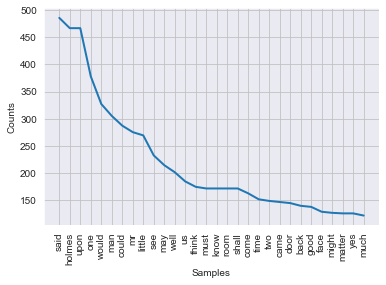

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# lastly we plot out the frequency of the words we decided were valuable
# even though in this case we have a lot of words that are not

sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(valuable_words)
nlp_words.plot(30)

In [35]:
# lets put it all into one cell and one function

import requests
from bs4 import BeautifulSoup
import re
import nltk
import seaborn as sns


def word_frequency(inURL):
    # get data from the link
    reading = requests.get(dataset)
    html = reading.text
    data = BeautifulSoup(html, 'html5lib')
    
    # Convert the text to tokens
    text = data.get_text()
    token = re.findall('\w+', text) # '\w+' matches the alphanumeric value of the text
    
    # pass tokens into a list
    words = []
    for word in token:
        words.append(word.lower())
        
    # remove stopwords
    stopwords = nltk.corpus.stopwords('english')
    
    goodwords = []
    for word in words:
        if word not in stopwords:
            goodwords.append(word)
            
    # figure out how to sort goodwords and return the most popular x terms
    # x is an integer given by the user
    # better to get data from an api than to scrape your own